# Treating the data
---
## Breakfast

### The main target here is to find out correlation between the products, in other words, when specific products are purchased together and what time these products are purshased.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

df_breakfast = pd.read_csv('../../datasets/exercise-2/breakfast.csv')
df_breakfast.shape

(21293, 4)

In [2]:
df_breakfast.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## 1st - Correlation between products purchased together

In [3]:
df_breakfast1 = df_breakfast.copy()
df_breakfast1['PIVOT'] = 1

In [4]:
# Creating Pivot table
df_breakfast1_pivot = df_breakfast1.pivot_table(values='PIVOT', index='Transaction', columns='Item', fill_value=0)
df_breakfast1_pivot.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,Fudge,Gift voucher,Gingerbread syrup,Granola,Hack the stack,Half slice Monster,Hearty & Seasonal,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Keeping It Local,Kids biscuit,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,NONE,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_breakfast1['Item'].unique().shape

(95,)

### Correlation Matrix

<AxesSubplot:xlabel='Item', ylabel='Item'>

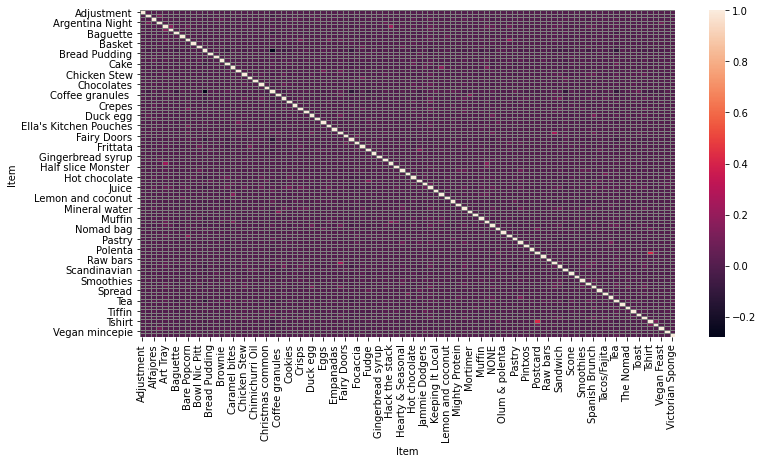

In [6]:
breakfest1_corr = df_breakfast1_pivot.corr()

plt.figure(figsize=[12, 6])
sns.heatmap(breakfest1_corr, linecolor='gray', linewidths=1)

### Undersizing correlation column to smoth visualization

In [7]:
breakfest1_corr = breakfest1_corr[breakfest1_corr >= 0.15]
c = breakfest1_corr.dropna(inplace=False, axis=0, thresh=2)
c = c.dropna(inplace=False, axis=1, thresh=2)
c.fillna(0, inplace=True)

<AxesSubplot:xlabel='Item', ylabel='Item'>

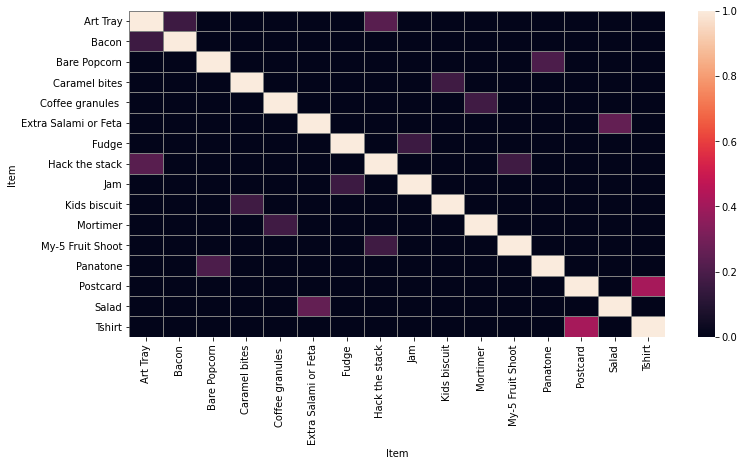

In [8]:
plt.figure(figsize=[12, 6])
sns.heatmap(c, linecolor='gray', linewidths=1)

---

## 2nd - Correlation between transaction's time and itens purchased

In [9]:
df_breakfast2 = df_breakfast.copy()
df_breakfast2.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [10]:
df_breakfast2 = df_breakfast.drop(columns=['Date', 'Transaction'])
df_breakfast2.head()

,Time,Item
0,09:58:11,Bread
1,10:05:34,Scandinavian
2,10:05:34,Scandinavian
3,10:07:57,Hot chocolate
4,10:07:57,Jam


In [11]:
df_breakfast2['Qt'] = 1
df_breakfast2.head(20)

,Time,Item,Qt
0,09:58:11,Bread,1
1,10:05:34,Scandinavian,1
2,10:05:34,Scandinavian,1
3,10:07:57,Hot chocolate,1
4,10:07:57,Jam,1
5,10:07:57,Cookies,1
6,10:08:41,Muffin,1
7,10:13:03,Coffee,1
8,10:13:03,Pastry,1
9,10:13:03,Bread,1


In [16]:
import datetime

def process_time(time):
    q1 = 15
    q2 = 45

    hm = str(time).split(':')
    h = datetime.timedelta(hours=int(hm[0]))
    m = int(hm[1])

    if m <= q1:
        return str(h)
    if m >= q2:
        return str(h + datetime.timedelta(hours=1))
    
    return str(h + datetime.timedelta(minutes=30))

df_breakfast2['Time'] = df_breakfast2['Time'].apply(process_time)
df_breakfast2['Time'] = df_breakfast2['Time'].str.slice(start=0, stop=5)
df_breakfast2.head(20)


,Time,Item,Qt
0,10:00,Bread,1
1,10:00,Scandinavian,1
2,10:00,Scandinavian,1
3,10:00,Hot chocolate,1
4,10:00,Jam,1
5,10:00,Cookies,1
6,10:00,Muffin,1
7,10:00,Coffee,1
8,10:00,Pastry,1
9,10:00,Bread,1


In [84]:
df_breakfast2_grouped = df_breakfast2.groupby(by=['Time', 'Item'], as_index=False).sum('Qt')
df_breakfast2_grouped.head(200)

,Time,Item,Qt
0,10:00,Afternoon with the baker,1
1,10:00,Alfajores,19
2,10:00,Baguette,14
3,10:00,Bakewell,5
4,10:00,Basket,1
...,...,...,...
195,11:30,Soup,7
196,11:30,Spanish Brunch,12
197,11:30,Tacos/Fajita,1
198,11:30,Tartine,7


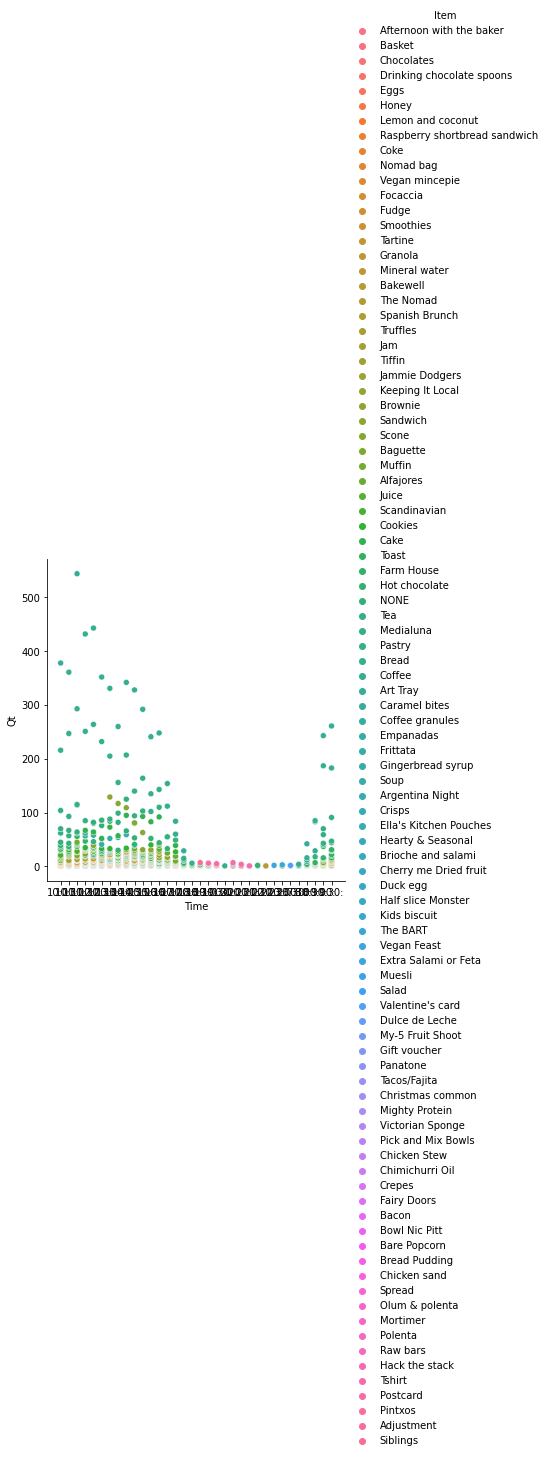

In [36]:
df_breakfast2_grouped.sort_values(by=['Time', 'Qt'], inplace=True)
sns.relplot(data=df_breakfast2_grouped, y='Qt', x='Time', hue='Item', kind='scatter')

<AxesSubplot:xlabel='Time', ylabel='Qt'>

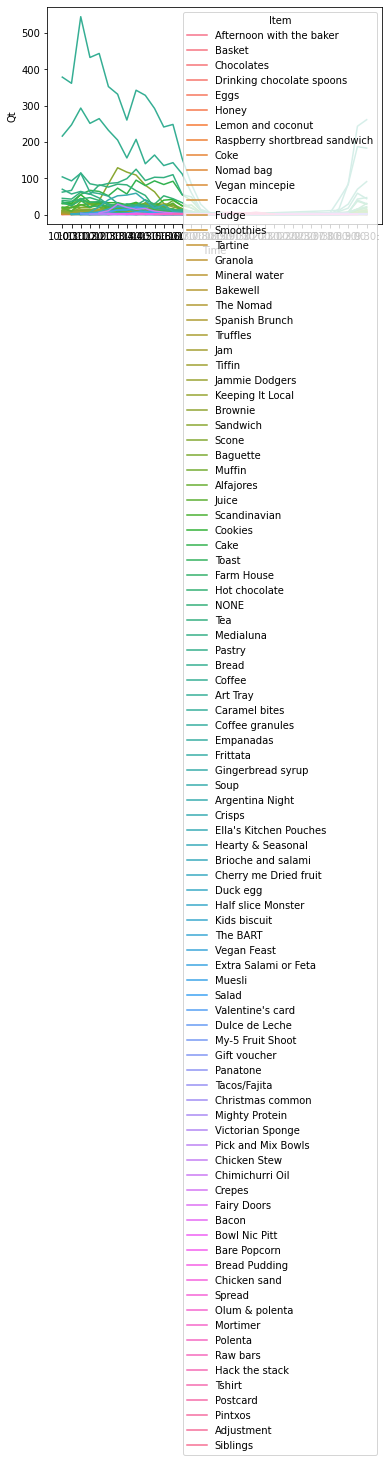

In [48]:
sns.lineplot(data=df_breakfast2_grouped, y='Qt', x='Time', hue='Item')

<AxesSubplot:xlabel='Item', ylabel='Qt'>

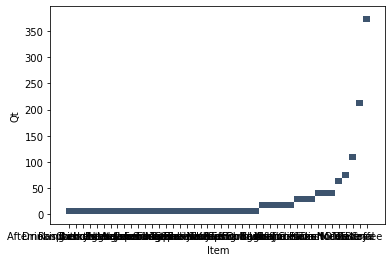

In [81]:
df_temp = df_breakfast2_grouped[df_breakfast2_grouped['Time'] == '10:00']
sns.histplot(data=df_temp[['Qt', 'Item']], x='Item', y='Qt')